In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [5]:
class_names = [ "T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" , "Ankle boot" ]

In [6]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape = [28, 28]), 
                                 keras.layers.Dense(300, activation = "relu" ), 
                                 keras.layers.Dense(100, activation = "relu" ), 
                                 keras.layers.Dense(10, activation = "softmax" )]) 

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss = "sparse_categorical_crossentropy", 
              optimizer = "sgd",
              metrics = ["accuracy"]) 

In [9]:
history = model.fit(X_train, 
                    y_train, 
                    epochs = 30, 
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7045 - accuracy: 0.7698 - val_loss: 0.4902 - val_accuracy: 0.8368
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4856 - accuracy: 0.8305 - val_loss: 0.4502 - val_accuracy: 0.8420
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4430 - accuracy: 0.8457 - val_loss: 0.4216 - val_accuracy: 0.8576
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4166 - accuracy: 0.8540 - val_loss: 0.4117 - val_accuracy: 0.8600
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3979 - accuracy: 0.8606 - val_loss: 0.4031 - val_accuracy: 0.8610
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3819 - accuracy: 0.8663 - val_loss: 0.3736 - val_accuracy: 0.8734
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3683 - accuracy: 0.8713 - val_loss: 0.3704 - val_accur

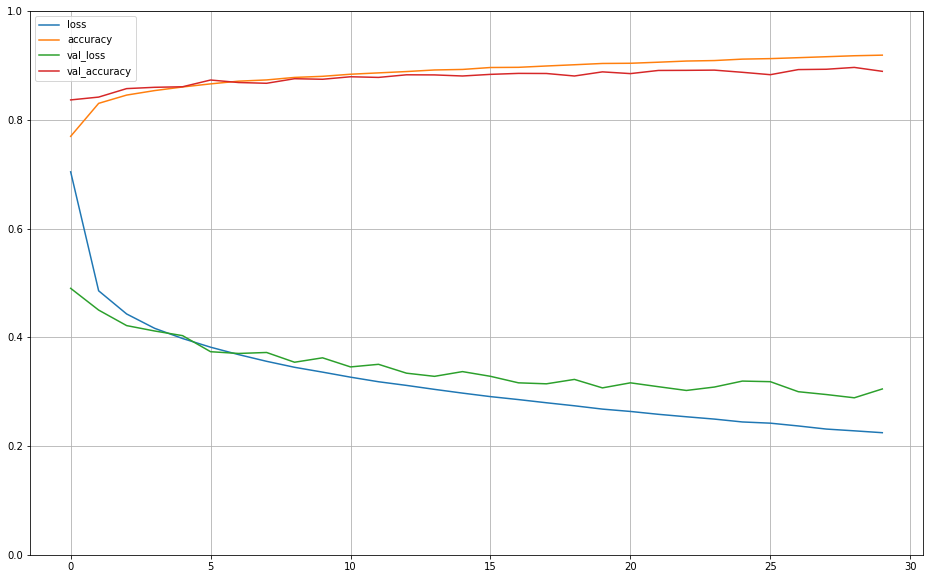

In [10]:
pd.DataFrame(history.history).plot(figsize = (16, 10)) 
plt.grid(True) 
plt.gca().set_ylim(0, 1) 
plt.show() 

In [11]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3340 - accuracy: 0.8796


[0.33397936820983887, 0.8795999884605408]